In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run plot.py

### Function for the random step
$DX$ is the standard deviation, $bias$ is the constant average of the step

In [2]:
# random seed for reproducibility
np.random.seed(12345)

# function for the random step, using lambda construction
# int() for cleaner look and for mimiking a detector with finite resolution
jump = lambda drift, stdev: int(np.random.normal(drift,stdev))

for i in range(10):
    print(jump(5,50))

-5
28
-20
-22
103
74
9
19
43
67


### Function for the added pattern
to add to part of a time series, over $z$ bins, with amplitude $a$

In [3]:
def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

[0, -5, 23, 3, -19, 84, 158, 167, 186, 229, 296, 351, 292, 310, 326, 398, 447, 352, 339, 427, 411, 390, 418, 585, 539, 516, 527, 547, 578, 583, 655, 625, 589, 476, 388, 350, 383, 325, 335, 287, 308, 196, 192, 120, 77, 17, 36, 59, 27, 48, 120, 128, 145, 149, 204, 275, 235, 163, 169, 211] 0
[183, 231, 235, 242, 280, 327, 285, 288, 307, 400, 449, 468, 575, 634, 655, 661, 561, 431, 270, 110, 126, 133, 81, 126, 152, 207, 303, 259, 306, 305, 355, 369, 482, 482, 587, 593, 637, 647, 615, 649, 661, 588, 565, 568, 527, 508, 511, 570, 624, 600, 684, 663, 690, 741, 668, 622, 607, 623, 619, 657] 1
[580, 623, 678, 663, 597, 579, 558, 521, 610, 643, 496, 417, 360, 369, 247, 190, 258, 256, 359, 489, 648, 783, 751, 706, 825, 746, 794, 774, 749, 796, 798, 793, 831, 835, 777, 810, 841, 801, 790, 777, 894, 865, 828, 836, 837, 826, 839, 855, 854, 851, 785, 799, 883, 811, 830, 807, 807, 804, 789, 732] 2


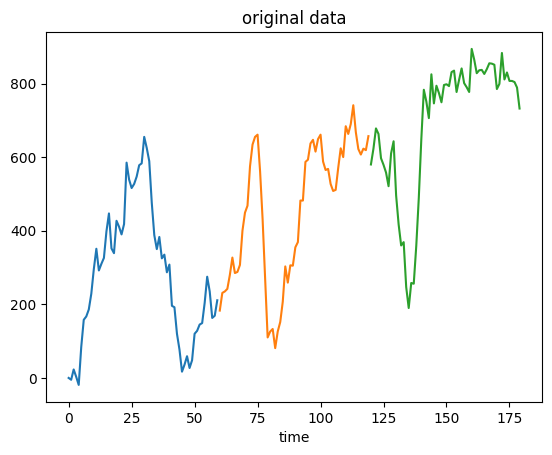

In [4]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
A=500

# number of data samples
N=10000
# size of each sample of the timeseries
L=60
# step parameters: introduce small positive bias 
DX = 50
bias = 5

y = [0] * N
x = [[0] * L for i in range(N)]
for i in range(N):
    if i>0:
        x[i][0] = x[i-1][-1] + jump(bias,DX)
    
    for j in range(1,L):
        x[i][j] = x[i][j-1] + jump(bias,DX)
        
    y[i] = i%3 
    ##y[i] = random.randint(0,2)
    if y[i]>0:
        j0 = np.random.randint(0,L-1-Z)
        ###print(i,j0,j1)
        sign = 3-2*y[i]
        for j in range(Z):
            x[i][j0+j] += sign*pattern(j,Z,A)
            
for i in range(min(3,N)):
    print(x[i],y[i])
    

Show_data(x,L,"original data")

### Save data on file

In [5]:
# command in linux
!mkdir DATA
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
print(str0)

fname='DATA/x_'+str0
np.savetxt(fname,x,fmt="%d")
fname='DATA/y_'+str0
np.savetxt(fname,y,fmt="%d")

ts_L60_Z12_A500_DX50_bias5_N10000.dat
